# Introduction to classification with neural networks

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_moons, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, Conv2D, Flatten, MaxPooling2D

from utils.utils import load_images_from_folder


In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Check if GPU is available
print("TensorFlow version:", tf.__version__)
print("GPU Available: ", len(tf.config.list_physical_devices('GPU')) > 0)


TensorFlow version: 2.17.0
GPU Available:  False


## 1. Multilayer Perceptron (MLP) for Binary Classification

### Theoretical Background

A Multilayer Perceptron consists of:
- An input layer
- One or more hidden layers of neurons
- An output layer (single neuron for binary classification)

For binary classification:
- The output layer typically has a sigmoid activation function
- The model outputs a probability between 0 and 1
- We use binary cross-entropy as the loss function

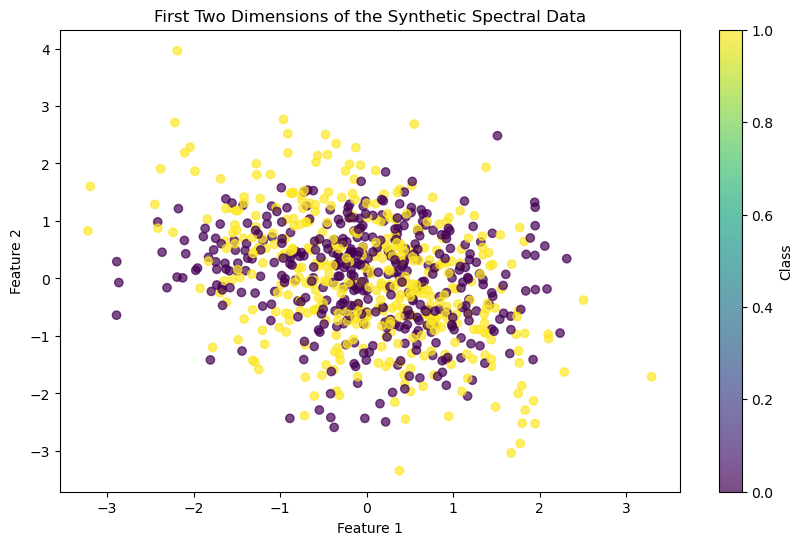

In [3]:
# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, 
                          n_redundant=5, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize the first two dimensions of our data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Class')
plt.title('First Two Dimensions of the Synthetic Spectral Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Epoch 1/50


/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5760 - loss: 0.7041 - val_accuracy: 0.6187 - val_loss: 0.6320
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7551 - loss: 0.5466 - val_accuracy: 0.7937 - val_loss: 0.5659
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7883 - loss: 0.4688 - val_accuracy: 0.8313 - val_loss: 0.5078
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8512 - loss: 0.3939 - val_accuracy: 0.8375 - val_loss: 0.4577
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8456 - loss: 0.3553 - val_accuracy: 0.8562 - val_loss: 0.4081
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8795 - loss: 0.3121 - val_accuracy: 0.8500 - val_loss: 0.3671
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.9033 - loss: 0.2681 - val_accuracy: 0.8625 - val_loss: 0.3332
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.9365 - loss: 0.2305 - val_accuracy: 0.8625 - val_loss: 0.3075

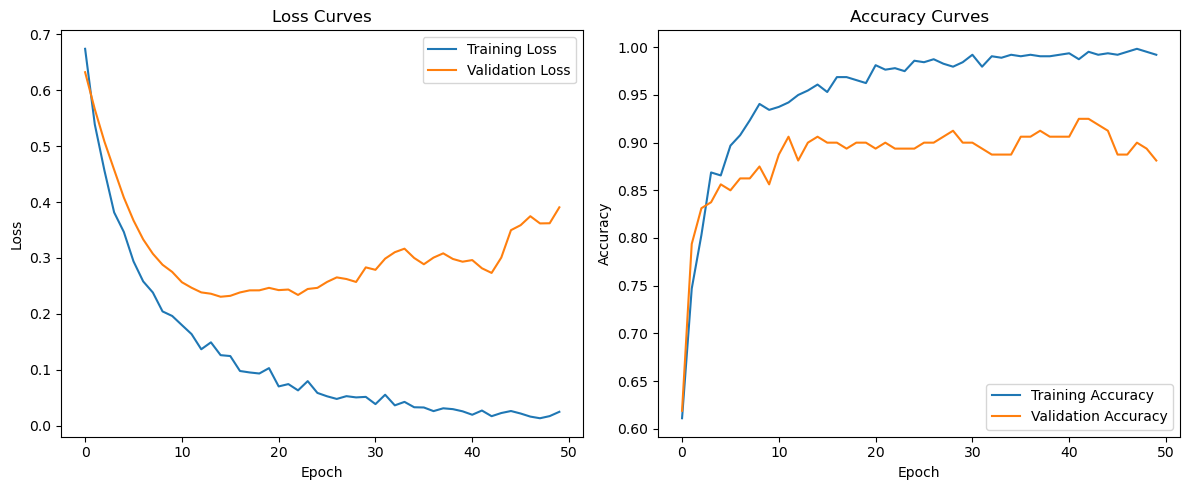

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       102
           1       0.98      0.88      0.92        98

    accuracy                           0.93       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



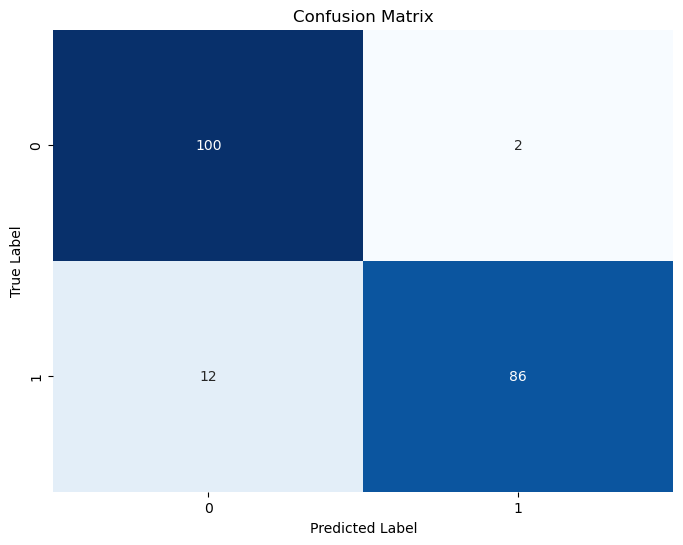

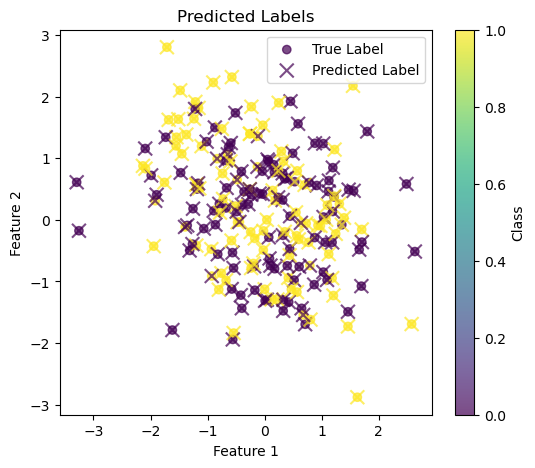

In [4]:
# Build the MLP model for binary classification
def create_mlp_binary_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Single output with sigmoid for binary classification
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and train the model
binary_model = create_mlp_binary_model(X_train.shape[1])
history = binary_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot the learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model
y_pred_proba = binary_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# plot data with predicted labels
plt.figure(figsize=(6, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.7, label = 'True Label')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', alpha=0.7, marker='x', s=100, label = 'Predicted Label')
plt.legend()
plt.colorbar(label='Class')
plt.title('Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Key Concepts in the MLP Model

1. **Dense Layers**: Fully connected layers where each neuron is connected to every neuron in the previous layer
2. **Activation Functions**: 
   - ReLU (Rectified Linear Unit) for hidden layers: `f(x) = max(0, x)`
   - Sigmoid for binary output: `f(x) = 1 / (1 + e^(-x))`
3. **BatchNormalization**: Normalizes the activations of the previous layer, stabilizing and accelerating training
4. **Dropout**: Randomly sets a fraction of inputs to zero during training to prevent overfitting
5. **Binary Cross-Entropy Loss**: Measures how well the model predicts the correct class


## 2. Multilayer Perceptron for Multi-Class Classification

Now let's extend our approach to multi-class classification

### Theoretical Background

For multi-class classification:
- The output layer has multiple neurons (one per class)
- We use the softmax activation function to get class probabilities
- We use categorical cross-entropy as the loss function

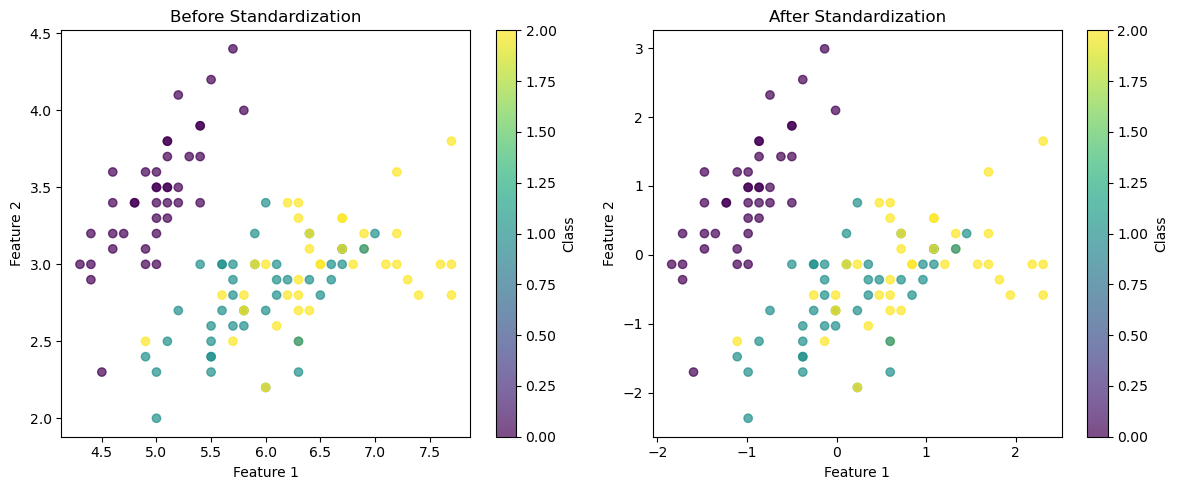

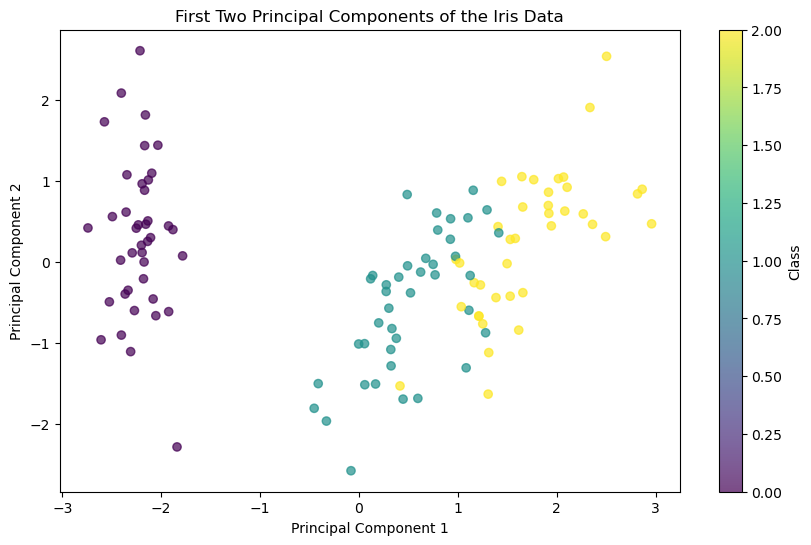

In [5]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_)
X_test = scaler.transform(X_test_)

# plot the data before and after standardization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_[:, 0], X_train_[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Class')
plt.title('Before Standardization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Class')
plt.title('After Standardization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

# perform a PCA and plot
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Class')
plt.title('First Two Principal Components of the Iris Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Epoch 1/50


/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3710 - loss: 1.0907 - val_accuracy: 0.6667 - val_loss: 0.9902
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4960 - loss: 0.9023 - val_accuracy: 0.7083 - val_loss: 0.9244
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6823 - loss: 0.7627 - val_accuracy: 0.8333 - val_loss: 0.8682
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7327 - loss: 0.6681 - val_accuracy: 0.8333 - val_loss: 0.8202
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7759 - loss: 0.5689 - val_accuracy: 0.8333 - val_loss: 0.7792
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7643 - loss: 0.5526 - val_accuracy: 0.8750 - val_loss: 0.7437
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8357 - loss: 0.4655 - val_accuracy: 0.8750 - val_loss: 0.7127
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7964 - loss: 0.4590 - val_accuracy: 0.8750 - val_loss: 0.6859
Epoch 9/50
6/6 ━━━

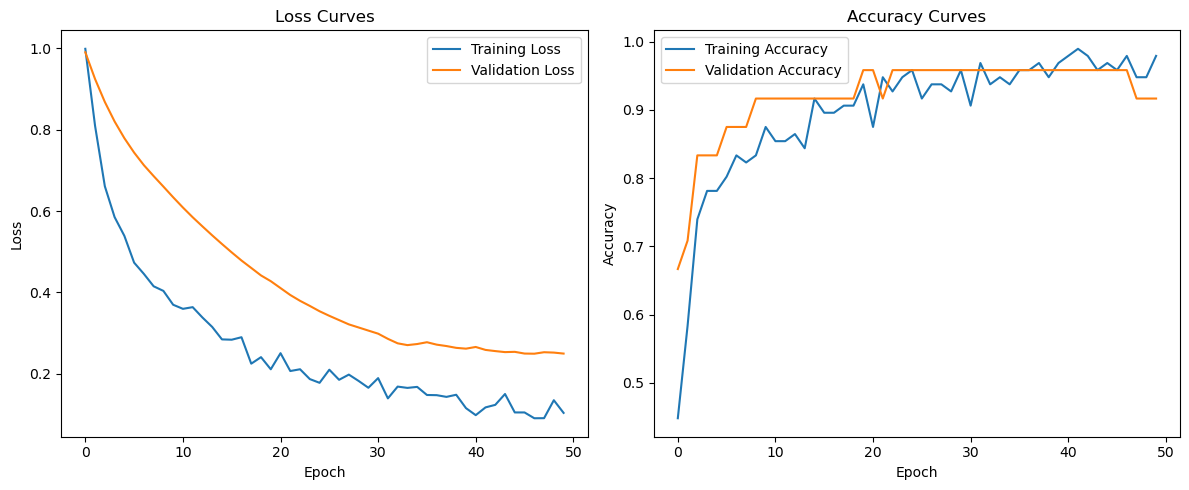

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Accuracy: 0.9666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



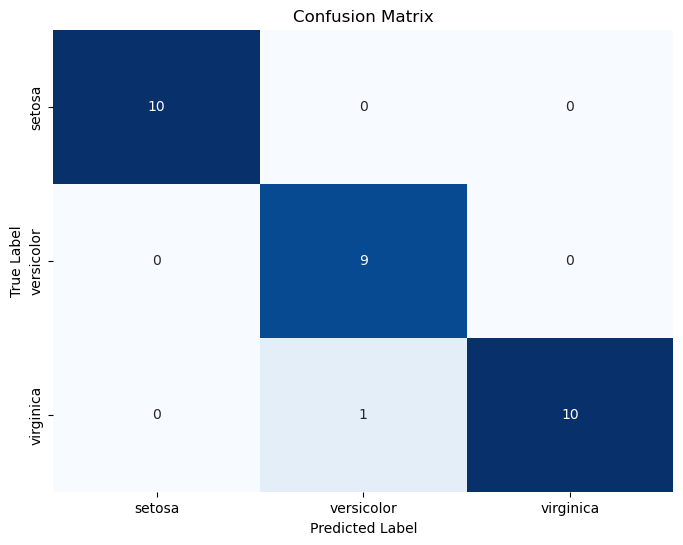

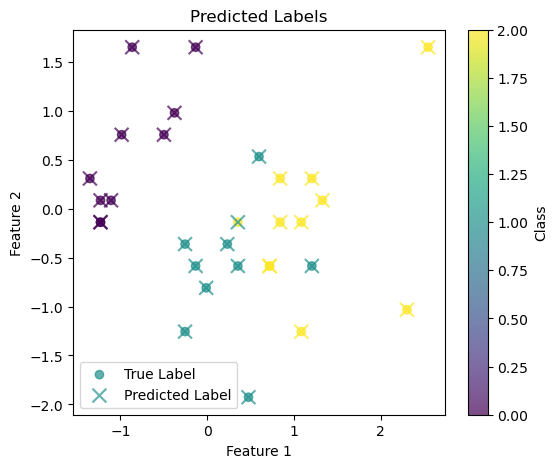

In [6]:
# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# Build the MLP model for multi-class classification
def create_mlp_multiclass_model(input_dim, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')  # Multiple outputs with softmax
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and train the model
multiclass_model = create_mlp_multiclass_model(X_train.shape[1], len(np.unique(y)))
history = multiclass_model.fit(
    X_train, y_train_onehot,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# Plot the learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model
y_pred_proba = multiclass_model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# plot data with predicted labels
plt.figure(figsize=(6, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.7, label = 'True Label')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', alpha=0.7, marker='x', s=100, label = 'Predicted Label')
plt.legend()
plt.colorbar(label='Class')
plt.title('Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Key Differences from Binary Classification

1. **Output Layer**: Uses multiple neurons (one per class) with softmax activation
2. **Softmax Function**: Converts raw scores to probabilities that sum to 1
   - $ softmax(z_i) = e^z_i / Σ(e^z_j) $ for all classes j
3. **Categorical Cross-Entropy Loss**: Measures the difference between predicted probability distributions and true labels
4. **One-Hot Encoding**: Converts class labels to binary vectors (e.g., class 2 of 3 classes → [0, 0, 1])


## 3. Convolutional Neural Networks (CNNs) for Classification

Convolutional Neural Networks are particularly useful for data with spatial relationships, or data where preservation of position is important (images,
time series, spectra, etc.)

### Theoretical Background

CNNs use:
- **Convolutional layers**: Apply filters to detect local patterns
- **Pooling layers**: Reduce dimensionality while preserving important features
- **Fully connected layers**: Make final classification decisions

CNNs are excellent for:
- Image classification (satellite images, microscope images)
- Spectral data classification 
- Time series data with local patterns

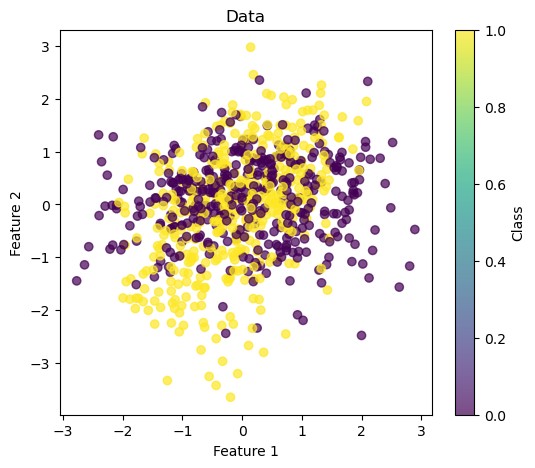

Epoch 1/50


/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6841 - loss: 0.7103 - val_accuracy: 0.7812 - val_loss: 0.6238
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9033 - loss: 0.2313 - val_accuracy: 0.7937 - val_loss: 0.5826
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9293 - loss: 0.2131 - val_accuracy: 0.7688 - val_loss: 0.5592
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9476 - loss: 0.1454 - val_accuracy: 0.7937 - val_loss: 0.5300
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9647 - loss: 0.1227 - val_accuracy: 0.8375 - val_loss: 0.4866
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9604 - loss: 0.1146 - val_accuracy: 0.8438 - val_loss: 0.4473
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9747 - loss: 0.0793 - val_accuracy: 0.8438 - val_loss: 0.4259
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9812 - loss: 0.0620 - val_accuracy: 0.8438 - val_loss: 0.3809
Epo

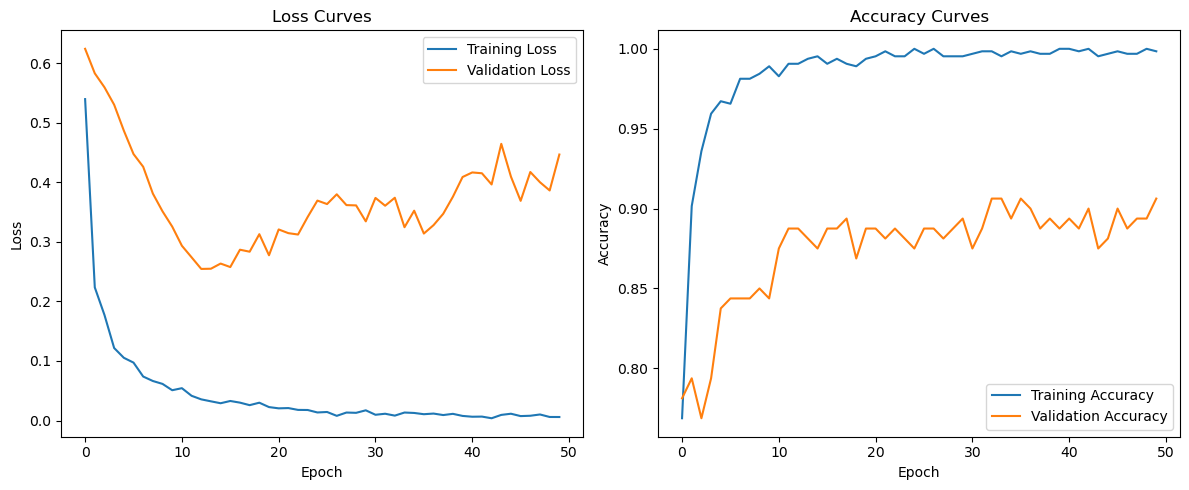

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/stepWARNING:tensorflow:5 out of the last 15 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x317fa09a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1D CNN Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       106
           1       0.90      0.96      0.93       

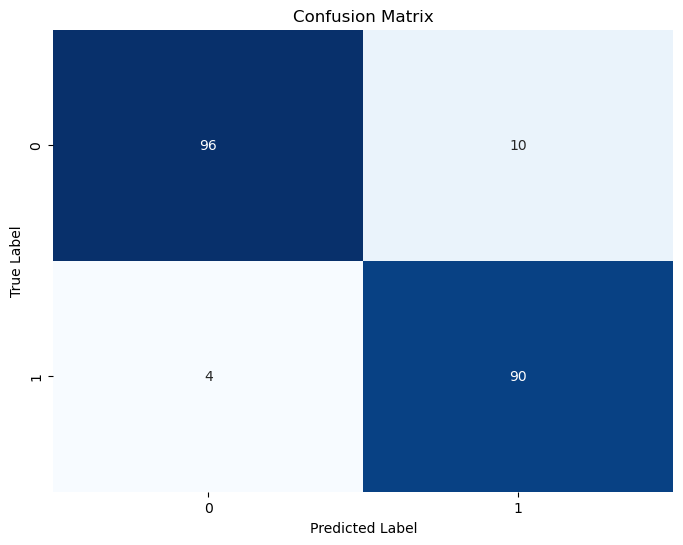

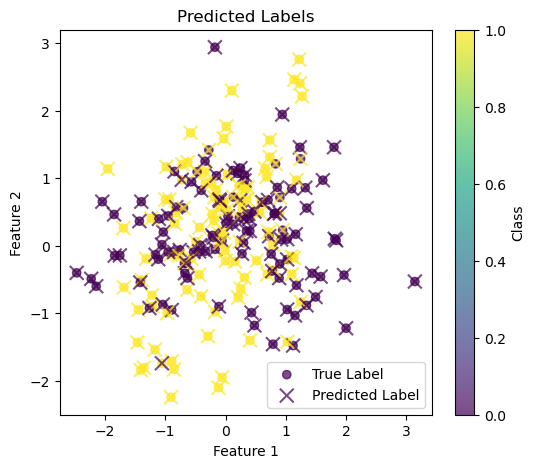

In [7]:
# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                          n_redundant=5, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# plot the data before and after standardization
plt.figure(figsize=(6, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Class')
plt.title('Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Reshape data for 1D CNN (adding a channel dimension)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the 1D CNN model
def create_1d_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Flatten(),
        Dense(32, activation='relu'),
        Dropout(0.4),
        Dense(1, activation='sigmoid')  # For binary classification
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and train the 1D CNN model
cnn_1d_model = create_1d_cnn_model((X_train_cnn.shape[1], 1))
history = cnn_1d_model.fit(
    X_train_cnn, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot the learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the 1D CNN model
y_pred_proba = cnn_1d_model.predict(X_test_cnn)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("1D CNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# plot data with predicted labels
plt.figure(figsize=(6, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.7, label = 'True Label')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', alpha=0.7, marker='x', s=100, label = 'Predicted Label')
plt.legend()
plt.colorbar(label='Class')
plt.title('Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Example: 2D CNN for Image Classification

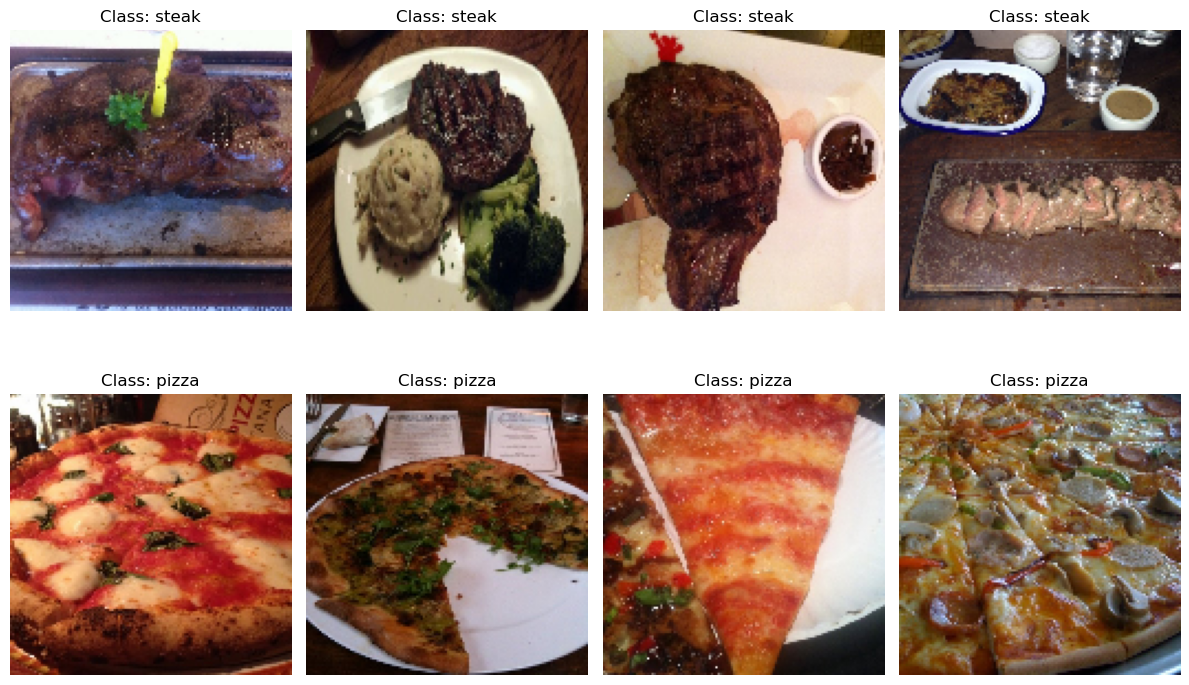

Epoch 1/100


/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.6169 - loss: 0.9154 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9303 - loss: 0.1713 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.9915 - loss: 0.0665 - val_accuracy: 0.9355 - val_loss: 0.2442
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 1.0000 - loss: 0.0447 - val_accuracy: 0.8387 - val_loss: 0.6965
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 1.0000 - loss: 0.0305 - val_accuracy: 0.7097 - val_loss: 0.9863
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 1.0000 - loss: 0.0313 - val_accuracy: 0.7097 - val_loss: 1.0104
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 1.0000 - loss: 0.0221 - val_accuracy: 0.7097 - val_loss: 0.8931
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 1.0000 - loss: 0.0163 - val_accuracy: 0.7097 - val_loss: 0.7

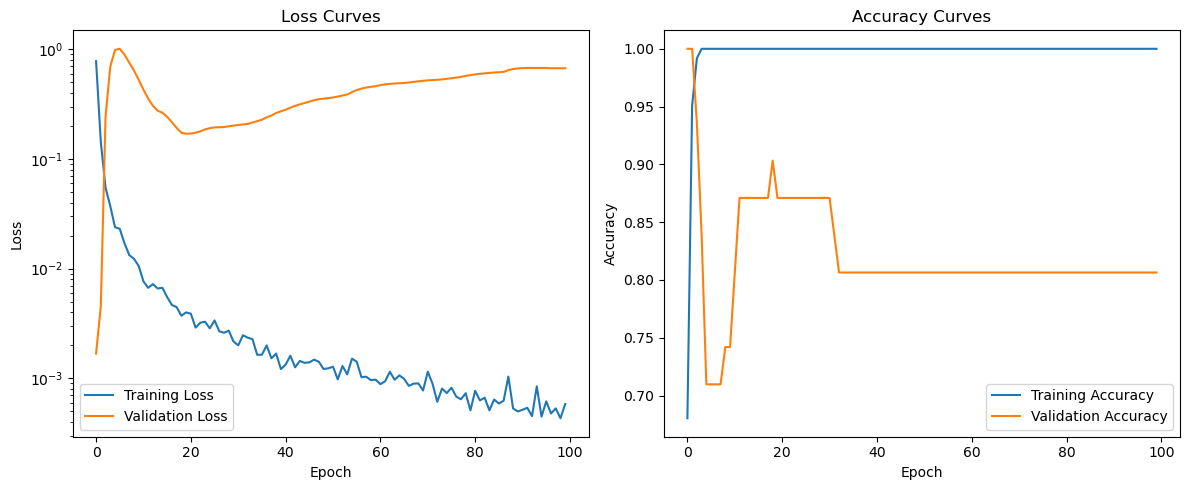

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2D CNN Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.70      0.74      0.72        19

    accuracy                           0.75        44
   macro avg       0.75      0.75      0.75        44
weighted avg       0.75      0.75      0.75        44



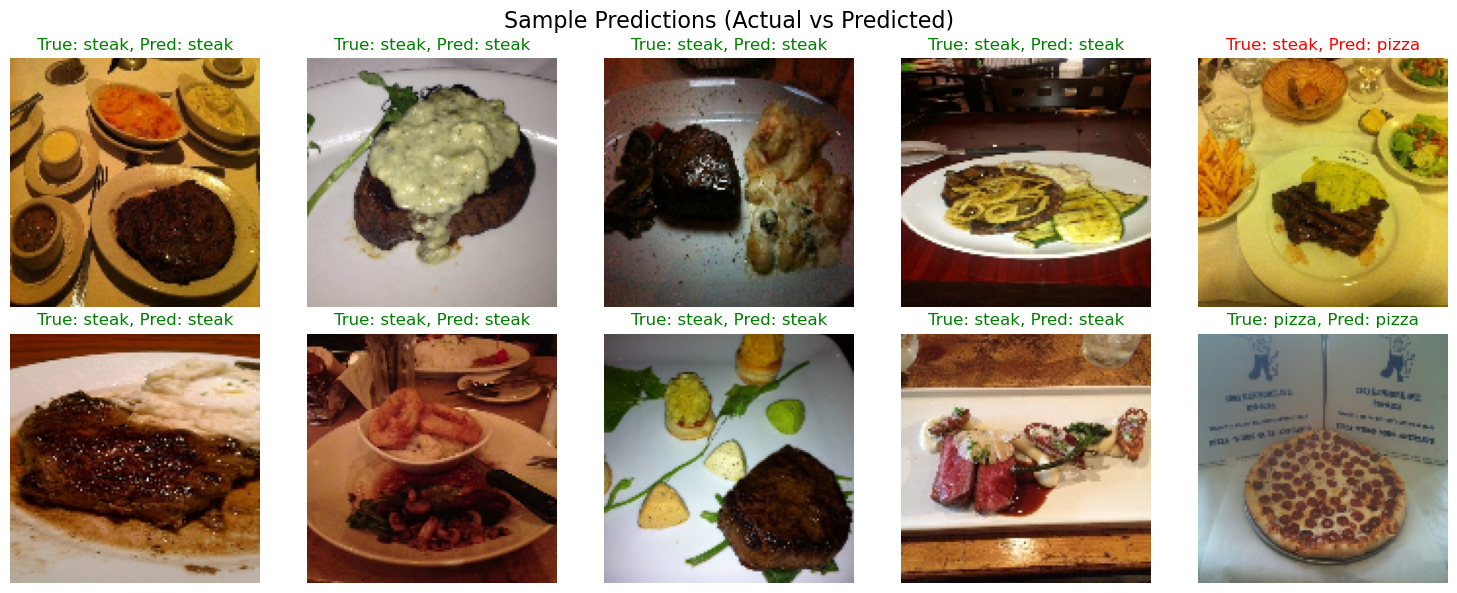

In [8]:
# Define paths
base_dir = "../../data/pizza_steak_sushi"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Image dimensions - adjust as needed for your model
img_height = 128
img_width = 128

X_train_img, y_train_labels = load_images_from_folder(train_dir, (img_height, img_width), classes_to_use=['pizza', 'steak'])
X_test_img, y_test_labels = load_images_from_folder(test_dir, (img_height, img_width), classes_to_use=['pizza', 'steak'])

# Convert string labels to numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_labels)
y_test_encoded = label_encoder.transform(y_test_labels)

# Display some example images
plt_i = 0
plt.figure(figsize=(12, 8))
for i in range(int(len(y_train_encoded)/2) - 5, int(len(y_train_encoded)/2) + 3): 
    plt.subplot(2, 4, plt_i+1)
    # Display the unnormalized image for better visualization
    img = X_train_img[i].copy()
    # Reverse preprocessing for display
    img = img / 256  # Approximate reverse of preprocessing
    plt.imshow(img)
    plt.title(f"Class: {label_encoder.classes_[y_train_encoded[i]]}")
    plt.axis('off')
    plt_i += 1
plt.tight_layout()
plt.show()

# Build the 2D CNN model (with L2 regularization)
def create_2d_cnn_model(input_shape):
    
    model = Sequential([
        # First convolutional block
        Conv2D(32, kernel_size=(3, 3), activation='relu', 
               input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Second convolutional block
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Third convolutional block
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        
        # Dense layers
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    

    # Compile with binary crossentropy loss
    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and train the 2D CNN model
cnn_2d_model = create_2d_cnn_model((img_height, img_width, 3))
history = cnn_2d_model.fit(
    X_train_img, y_train_encoded,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot the learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the 2D CNN model
y_pred_proba = cnn_2d_model.predict(X_test_img)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("2D CNN Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample Predictions (Actual vs Predicted)', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    idx = i + 10  # Skip the first few for variety
    ax.imshow(X_test_img[idx].reshape(img_height, img_width, 3) / 256)
    pred_class = int(y_pred[idx])
    true_class = int(y_test_encoded[idx])
    
    color = 'green' if pred_class == true_class else 'red'
    ax.set_title(f"True: {label_encoder.classes_[true_class]}, Pred: {label_encoder.classes_[pred_class]}", color=color)
    ax.axis('off')

# set first axis to logy
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

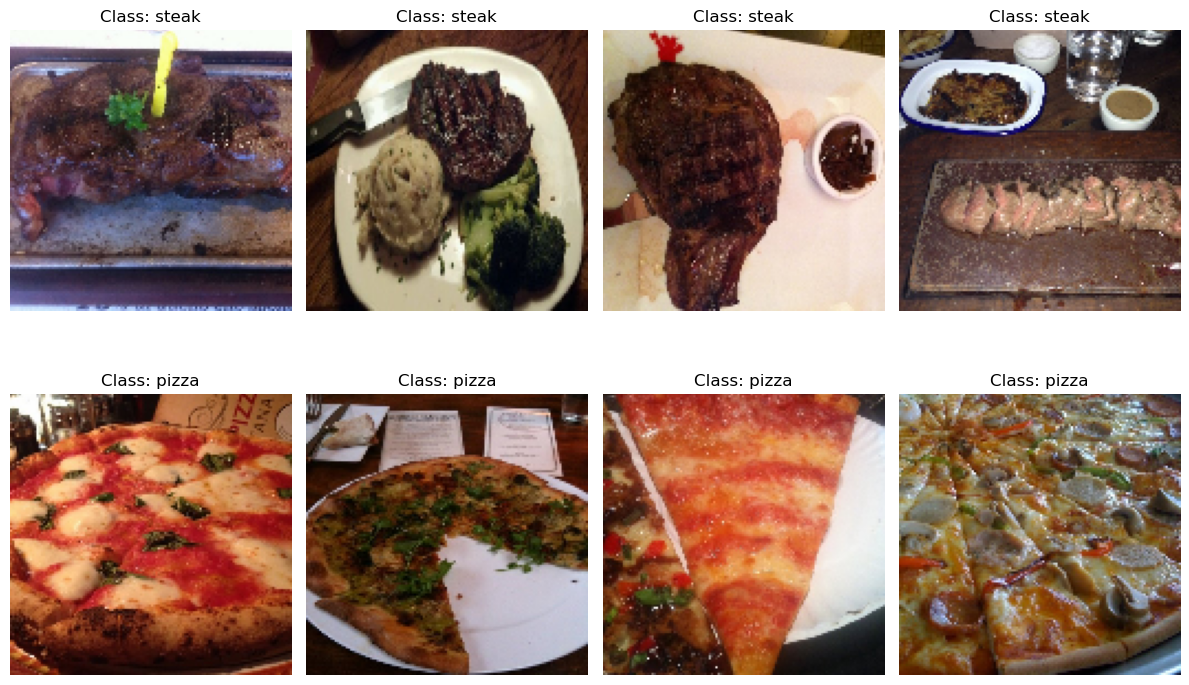

Epoch 1/100


/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.6045 - loss: 3.6833 - val_accuracy: 0.6774 - val_loss: 3.9800 - learning_rate: 5.0000e-04
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.7898 - loss: 3.1335 - val_accuracy: 0.6774 - val_loss: 4.2590 - learning_rate: 5.0000e-04
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.8471 - loss: 2.9554 - val_accuracy: 0.4839 - val_loss: 7.0699 - learning_rate: 5.0000e-04
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.8450 - loss: 2.9529 - val_accuracy: 0.4839 - val_loss: 7.2178 - learning_rate: 5.0000e-04
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.8721 - loss: 2.8077 - val_accuracy: 0.5484 - val_loss: 5.1419 - learning_rate: 5.0000e-04
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.8622 - loss: 2.7986 - val_accuracy: 0.6774 - val_loss: 3.1968 - learning_rate: 5.0000e-04
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.9334 - loss: 2.59

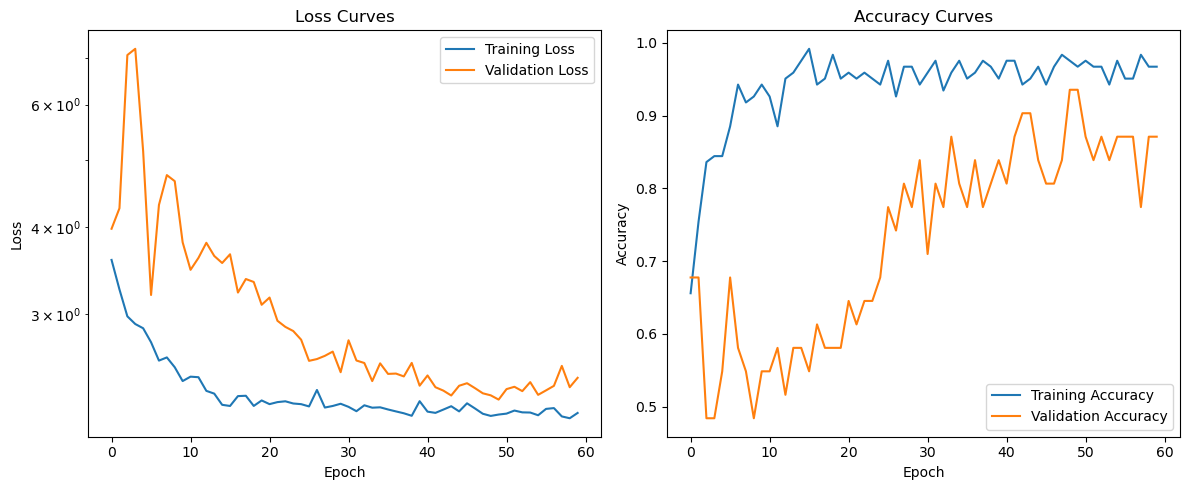

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2D CNN Accuracy: 0.8409090909090909

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.77      0.89      0.83        19

    accuracy                           0.84        44
   macro avg       0.84      0.85      0.84        44
weighted avg       0.85      0.84      0.84        44



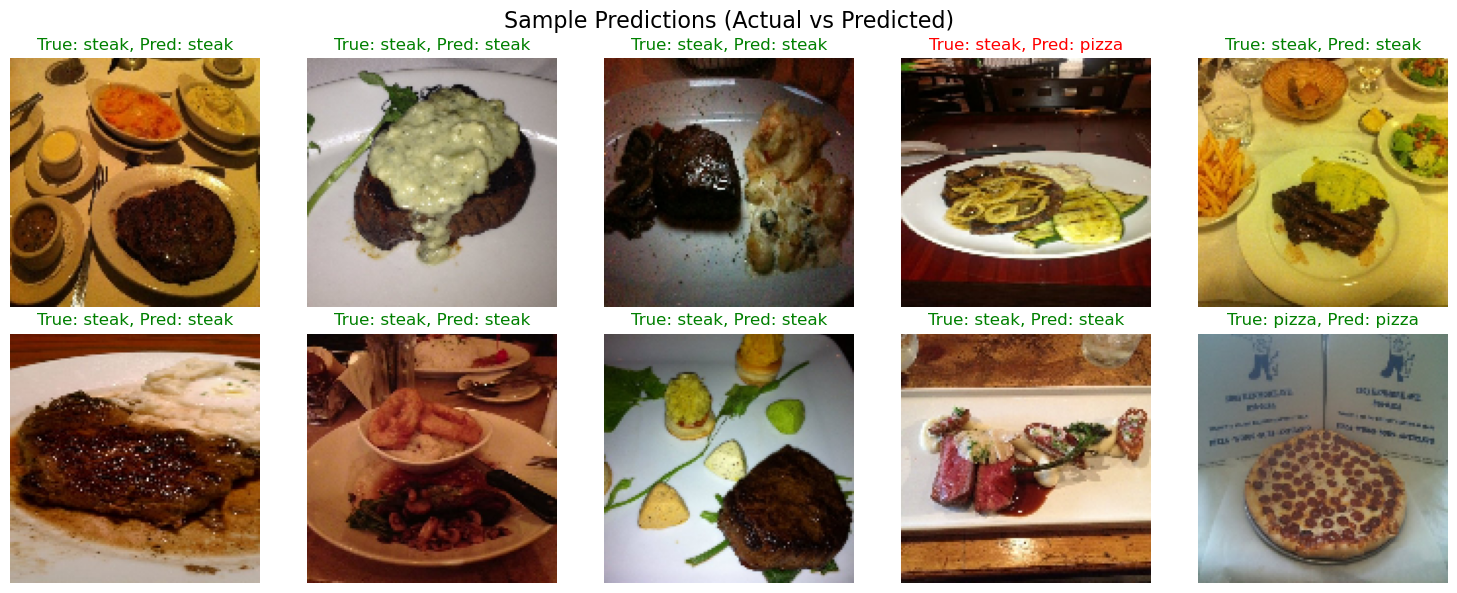

In [ ]:
# Define paths
base_dir = "../../data/pizza_steak_sushi"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Image dimensions - adjust as needed for your model
img_height = 128
img_width = 128

X_train_img, y_train_labels = load_images_from_folder(train_dir, (img_height, img_width), classes_to_use=['pizza', 'steak'])
X_test_img, y_test_labels = load_images_from_folder(test_dir, (img_height, img_width), classes_to_use=['pizza', 'steak'])

# Convert string labels to numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_labels)
y_test_encoded = label_encoder.transform(y_test_labels)

# Display some example images
plt_i = 0
plt.figure(figsize=(12, 8))
for i in range(int(len(y_train_encoded)/2) - 5, int(len(y_train_encoded)/2) + 3): 
    plt.subplot(2, 4, plt_i+1)
    # Display the unnormalized image for better visualization
    img = X_train_img[i].copy()
    # Reverse preprocessing for display
    img = img / 256  # Approximate reverse of preprocessing
    plt.imshow(img)
    plt.title(f"Class: {label_encoder.classes_[y_train_encoded[i]]}")
    plt.axis('off')
    plt_i += 1
plt.tight_layout()
plt.show()

# Build the 2D CNN model (with L2 regularization)
def create_2d_cnn_model(input_shape):
    
    model = Sequential([
        # First convolutional block
        Conv2D(32, kernel_size=(3, 3), activation='relu', 
               input_shape=input_shape, kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Second convolutional block
        Conv2D(64, kernel_size=(3, 3), activation='relu', 
               kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Third convolutional block
        Conv2D(64, kernel_size=(3, 3), activation='relu', 
               kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        
        # Dense layers
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))
    ])
    
    # Add learning rate reduction when plateauing
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.000005
    )
    
    # Use early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        start_from_epoch = 20
    )

    # Compile with binary crossentropy loss
    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model, [reduce_lr, early_stopping]


# Data augmentation for training images
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# split the data into train and val
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(
    X_train_img, y_train_encoded, test_size=0.2, random_state=42
)

# Create and train the 2D CNN model
cnn_2d_model, callbacks = create_2d_cnn_model((img_height, img_width, 3))
history = cnn_2d_model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=32),
    epochs=100,
    batch_size=32,
    validation_data=datagen.flow(X_val, y_val_encoded, batch_size=32),
    verbose=1,
    callbacks=callbacks
)

# Plot the learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the 2D CNN model
y_pred_proba = cnn_2d_model.predict(X_test_img)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("2D CNN Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample Predictions (Actual vs Predicted)', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    idx = i + 10  # Skip the first few for variety
    ax.imshow(X_test_img[idx].reshape(img_height, img_width, 3) / 256)
    pred_class = int(y_pred[idx])
    true_class = int(y_test_encoded[idx])
    
    color = 'green' if pred_class == true_class else 'red'
    ax.set_title(f"True: {label_encoder.classes_[true_class]}, Pred: {label_encoder.classes_[pred_class]}", color=color)
    ax.axis('off')

# set first axis to logy
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### Key Concepts in CNNs

1. **Convolutional Layers**:
   - Apply filters (kernels) that slide over the input data
   - Detect local patterns: edges, textures, etc.
   - Parameters: number of filters, kernel size, stride, padding

2. **Pooling Layers**:
   - Reduce spatial dimensions (downsampling)
   - Most common: Max Pooling (takes maximum value in each window)
   - Provides translation invariance

3. **Flattening Layer**:
   - Converts 2D feature maps to 1D feature vector for fully connected layers

4. **Advantages**:
   - Can detect features and patterns in data
   - Translation invariant (features can be detected regardless of position)

## 4. Recurrent Neural Networks (RNNs) for Sequential Data Classification

Recurrent Neural Networks are designed for sequential data, which may be relevant for time series data in planetary science.

### Theoretical Background

RNNs process sequences by maintaining a hidden state that captures information from previous steps:
- **Simple RNN**: Basic recurrent unit, prone to vanishing gradient problem
- **LSTM (Long Short-Term Memory)**: Better at capturing long-term dependencies
- **GRU (Gated Recurrent Unit)**: Simplified version of LSTM with similar performance

RNNs are useful for:
- Time series classification (e.g., seismic data)
- Sequence labeling
- Anomaly detection in sequential data

### Example: LSTM for Time Series Classification

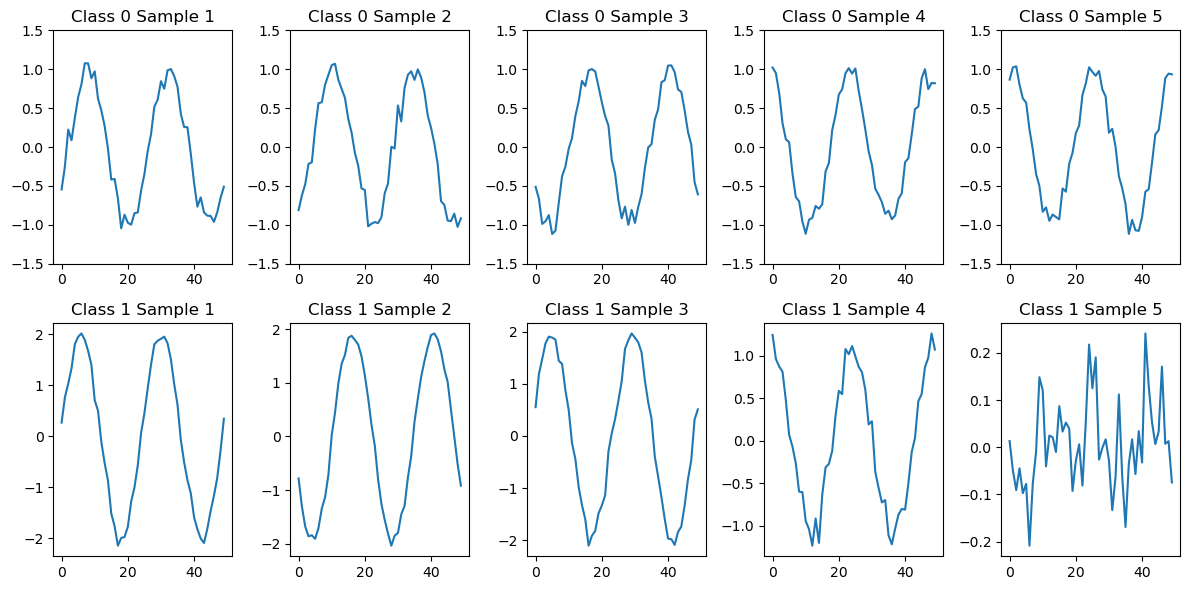

In [138]:
# Create a synthetic time series dataset
def create_time_series_data(n_samples=1000, sequence_length=20, n_features=1):
    X = np.zeros((n_samples, sequence_length, n_features))
    y = np.zeros(n_samples)
    
    for i in range(n_samples):
        # Class 0: Sine wave with random phase
        # Class 1: two overlapping waves with random phase
        phase = np.random.uniform(0, 2*np.pi)
        time = np.linspace(0, 4*np.pi, sequence_length)
        
        if i < n_samples // 2:
            # Class 0: Sine wave
            X[i, :, 0] = np.sin(time + phase) + np.random.normal(0, 0.1, sequence_length)
            y[i] = 0
        else:
            # Class 1: two overlapping waves
            X[i, :, 0] = np.sin(time + phase) + np.sin(time + phase + np.pi * np.random.normal(0, np.pi)) + np.random.normal(0, 0.1, sequence_length)
            y[i] = 1
    
    return X, y

# Generate synthetic time series data
X_ts, y_ts = create_time_series_data(n_samples=1000, sequence_length=50, n_features=1)

# Split the data
X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(
    X_ts, y_ts, test_size=0.2, random_state=42
)

# Visualize some examples
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.plot(X_ts[i, :, 0])
    plt.title(f"Class 0 Sample {i+1}")
    plt.ylim(-1.5, 1.5)
    
    plt.subplot(2, 5, i+6)
    plt.plot(X_ts[i+500, :, 0])
    plt.title(f"Class 1 Sample {i+1}")
    # plt.ylim(-1.5, 1.5)
    
plt.tight_layout()
plt.show()

Epoch 1/30


/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5540 - loss: 0.6926 - val_accuracy: 0.4938 - val_loss: 0.6902
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5659 - loss: 0.6813 - val_accuracy: 0.5625 - val_loss: 0.6573
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6751 - loss: 0.5855 - val_accuracy: 0.7688 - val_loss: 0.4696
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7632 - loss: 0.4372 - val_accuracy: 0.9125 - val_loss: 0.3228
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8646 - loss: 0.3171 - val_accuracy: 0.9375 - val_loss: 0.2782
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9346 - loss: 0.2705 - val_accuracy: 0.8938 - val_loss: 0.3667
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9015 - loss: 0.3096 - val_accuracy: 0.9438 - val_loss: 0.2553
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9537 - loss: 0.2404 - val_accuracy: 0.9250 - val_loss: 0.

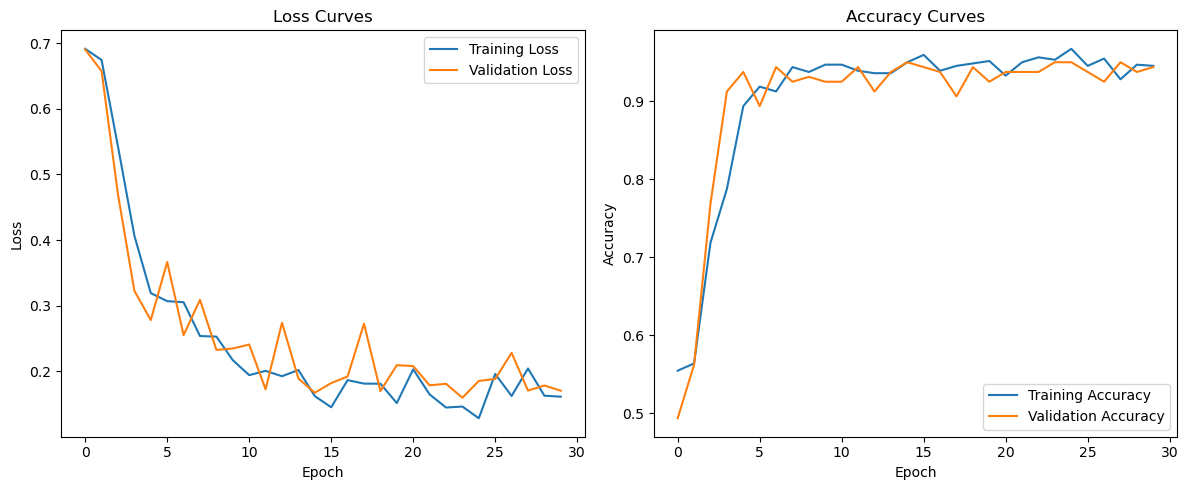

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
LSTM Accuracy: 0.945

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95        96
         1.0       0.99      0.90      0.94       104

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.94       200



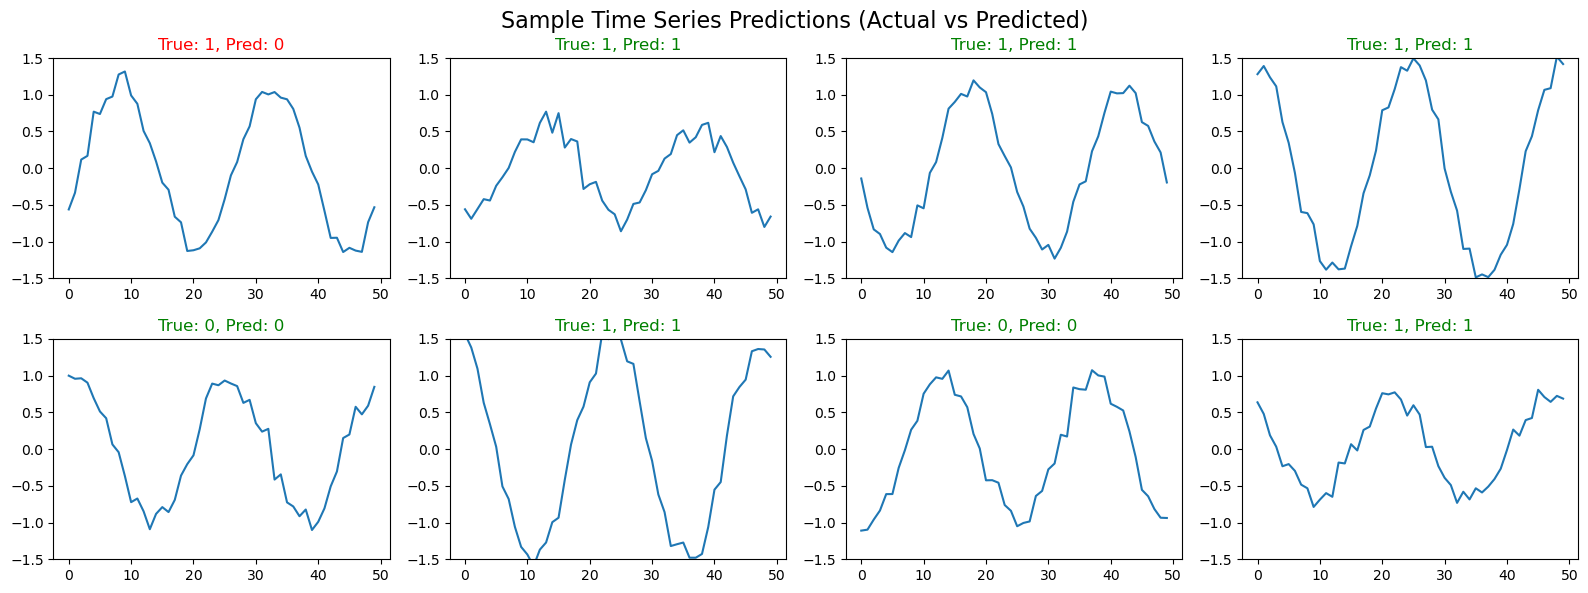

In [140]:
# Import LSTM layers
from tensorflow.keras.layers import LSTM

# Build the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and train the LSTM model
lstm_model = create_lstm_model((X_train_ts.shape[1], X_train_ts.shape[2]))
history = lstm_model.fit(
    X_train_ts, y_train_ts,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot the learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the LSTM model
y_pred_proba = lstm_model.predict(X_test_ts)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("LSTM Accuracy:", accuracy_score(y_test_ts, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_ts, y_pred))

# Visualize some predictions
fig, axes = plt.subplots(2, 4, figsize=(16, 6))
fig.suptitle('Sample Time Series Predictions (Actual vs Predicted)', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    idx = i + 5  # Skip the first few for variety
    ax.plot(X_test_ts[idx, :, 0])
    
    pred_class = int(y_pred[idx])
    true_class = int(y_test_ts[idx])
    
    color = 'green' if pred_class == true_class else 'red'
    ax.set_title(f"True: {true_class}, Pred: {pred_class}", color=color)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### Key Concepts in RNNs

1. **Recurrent Connections**:
   - Process sequential data by maintaining a hidden state
   - Allow information to persist across time steps

2. **LSTM Architecture**:
   - Cell state: Long-term memory component
   - Gates: Input, forget, and output gates control information flow
   - Solves vanishing gradient problem of simple RNNs

3. **Advantages for Planetary Science Applications**:
   - Useful for time series data 
   - Can capture temporal patterns in data collected over time
   - Applicable to sensor readings with sequential structure

## Practical Tips for Neural Network Classification

### 1. Data Preparation
- **Normalization**: Always normalize/standardize your data
- **Class Imbalance**: Use class weights or data augmentation for imbalanced datasets
- **Data Augmentation**: For limited image data, augment with rotations, flips, etc.

### 2. Model Selection
- Start simple (MLP) and increase complexity if needed
- Consider data type when selecting model architecture
- Use transfer learning when data are limited

### 3. Hyperparameter Tuning
- Learning rate is often the most important hyperparameter
- Use learning rate schedulers for better convergence
- Consider regularization techniques (L1/L2, dropout) to prevent overfitting

### 4. Evaluation
- Use appropriate metrics beyond accuracy (precision, recall, F1-score)
- Always separate test data from training/validation
- Consider cross-validation for more robust evaluation

## Additional Resources and References

1. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.
2. Chollet, F. (2021). Deep Learning with Python, Second Edition. Manning Publications.
3. TensorFlow Tutorials: [https://www.tensorflow.org/tutorials](https://www.tensorflow.org/tutorials)

  
## Exercises if you want to learn more

1. Modify the MLP architecture to improve performance on the multi-class classification problem.
2. Apply data augmentation to the image datasets and observe the effect on model performance.
3. Experiment with different pre-trained models for transfer learning (e.g., ResNet, EfficientNet).
4. Create a hybrid model that combines CNN and LSTM layers for classifying time series of images.
5. Apply one of these models to a real dataset from your research!